# **Homework 2**
## dataset generation

The first request of the homework is to generate our own dataset.
It is done manually with the help of the commands:
  *tcpdump & curl website x 10 times *

After having obtained each .pcap file for the dataset, those are converted into a .csv, with the help of **tshark**.

The second request was to consider only https traffic. 
In wireshark there isnt a proper filter for https,but we can use some tricks based on the knowledge of this protocol that will help filtering out what it isn't https.

HTTPS works with the help of the tls, transport layer security protocol or ssl.

it is a protocol stacked on tcp and it is characterized by some exchanges between the server and the client that are in the following summarized:


1.   Client-hello
2.   Server-hello
3.   Server Certificate
4.   Certificate Request
5.   Server Hello Done 
6.   Client Certificate
7.   Client Key Exchange
8.   Certificate Verify
9.   Finished

The messages are part of the tcp data packets, for this reason the following filters applied to tcpdump will be useful to identify only the packets related to the https exchange between the client and the server.


`!tcpdump -i ...."(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21`)"


In [299]:
!apt-get install tcpdump
!apt-get install curl
!apt-get install tshark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpcap0.8
Suggested packages:
  apparmor
The following NEW packages will be installed:
  libpcap0.8 tcpdump
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 482 kB of archives.
After this operation, 1,408 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpcap0.8 amd64 1.8.1-6ubuntu1.18.04.2 [118 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 tcpdump amd64 4.9.3-0ubuntu0.18.04.1 [364 kB]
Fetched 482 kB in 1s (595 kB/s)
Selecting previously unselected package libpcap0.8:amd64.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../libpcap0.8_1.8.1-6ubuntu1.18.04.2_amd64.deb ...
Unpacking libpcap0.8:amd64 (1.8.1-6ubuntu1.18.04.2) ...
Selecting previously unselected package tcpdump.
Preparing

#tcpdump commands with filter for https:

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w ndtv_capture.pcapng & (sleep 10;curl 'https://www.ndtv.com'> /dev/null) & (sleep 10; curl 'https://www.ndtv.com'> /dev/null) & (sleep 10; curl -s 'https://www.ndtv.com'> /dev/null) & (sleep 10; curl 'https://www.ndtv.com'> /dev/null) & (sleep 10; curl -s 'https://www.ndtv.com'> /dev/null) & (sleep 10;curl -s 'https://www.ndtv.com'> /dev/null) & ( sleep 10;curl 'https://www.ndtv.com'> /dev/null) & (sleep 10;curl 'https://www.ndtv.com'> /dev/null) & (sleep 10;curl 'https://www.ndtv.com'> /dev/null) & (sleep 10; curl 'https://www.ndtv.com'> /dev/null) & (sleep 110;killall tcpdump);

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w abc.pcapng  & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 180;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w news_google.pcapng & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null ) & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null)  & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 110;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w daily_mail.pcapng & (sleep 10;curl 'https://www.dailymail.co.uk'> /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk'> /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk'> /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk'> /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk'> /dev/null ) & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null ) & (sleep 110;killall tcpdump) 

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w indiatimes.pcapng & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10; curl 'https://www.indiatimes.com' > /dev/null) & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w timesofindia.pcapng & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10; curl 'https://www.timesofindia.com' > /dev/null) & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w news_yahoo.pcapng & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w express.pcapng & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 10; curl 'https://www.express.co.uk' > /dev/null) & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w "washingtonpost.pcapng" "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10; curl 'https://www.whasingtonpost.com' > /dev/null) & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10; curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10; curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10; curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 110;killall tcpdump) 

In [ ]:
!tcpdump -i eth0 -w 'msn.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10; curl 'https://www.msn.com'> /dev/null) & (sleep 10;curl 'https://www.msn.com'> /dev/null) & (sleep 10; curl 'https://www.msn.com'> /dev/null) & (sleep 10; curl 'https://www.msn.com' > /dev/null) & (sleep 10;curl 'https://www.msn.com' > /dev/null) & (sleep 10;curl 'https://www.msn.com' > /dev/null)  & (sleep 10;curl 'https://www.msn.com' > /dev/null) & (sleep 10;curl 'https://www.msn.com' > /dev/null) & (sleep 10;curl 'https://www.msn.com' > /dev/null) & (sleep 10;curl 'https://www.msn.com' > /dev/null) & (sleep 110;killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'rt.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10; curl 'https://www.rt.com'> /dev/null) & (sleep 10;curl 'https://www.rt.com'> /dev/null) & (sleep 10;curl 'https://www.rt.com'> /dev/null) & (sleep 10;curl 'https://www.rt.com'> /dev/null) & (sleep 10; curl 'https://www.rt.com'> /dev/null) & (sleep 10;curl 'https://www.rt.com'> /dev/null) & (sleep 10;curl 'https://www.rt.com'> /dev/null) & (sleep 10;curl 'https://www.rt.com' > /dev/null) & (sleep 10;curl 'https://www.rt.com' > /dev/null) & (sleep 10;curl 'https://www.rt.com' > /dev/null) & (sleep 110;killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'foxnews.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10;curl 'https://www.foxnews.com'> /dev/null) & (sleep 10;curl 'https://www.foxnews.com'> /dev/null) & (sleep 10;curl 'https://www.foxnews.com'> /dev/null) & (sleep 10;curl 'https://www.foxnews.com'> /dev/null) & (sleep 10;curl 'https://www.foxnews.com'> /dev/null) & (sleep 10;curl 'https://www.foxnews.com'> /dev/null) & (sleep 10;curl 'https://www.foxnews.com'> /dev/null) & ( sleep 10; curl 'https://www.foxnews.com'> /dev/null) & (sleep 10; curl 'https://www.foxnews.com'> /dev/null) & (sleep 10; curl 'https://www.foxnews.com'> /dev/null) & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'finance_yahoo.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10; curl 'https://www.finance.yahoo.com' > /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com' > /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com'> /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com'> /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com'> /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com'> /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.finance.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.finance.yahoo.com' > /dev/null) & (sleep 10; curl 'https://www.finance.yahoo.com' > /dev/null)  & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'nypost.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10 ;curl 'https://www.nypost.com' >/dev/null) & (sleep 10 ;curl 'https://www.nypost.com'>/dev/null) & (sleep 10 ;curl 'https://www.nypost.com'>/dev/null) & (sleep 10 ;curl 'https://www.nypost.com'>/dev/null) & (sleep 10 ;curl 'https://www.nypost.com'>/dev/null) & (sleep 10 ;curl 'https://www.nypost.com'>/dev/null) & (sleep 10 ;curl 'https://www.nypost.com'>/dev/null) & (sleep 10 ;curl 'https://www.nypost.com'>/dev/null) & (sleep 10 ;curl 'https://www.nypost.com' >/dev/null) & (sleep 10 ;curl 'https://www.nypost.com' >/dev/null) & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'theguardian.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10;curl 'https://www.theguardian.com'>/dev/null) & (sleep 10;curl 'https://www.theguardian.com'>/dev/null) & (sleep 10;curl 'https://www.theguardian.com'>/dev/null) & (sleep 10;curl 'https://www.theguardian.com'>/dev/null) & (sleep 10;curl 'https://www.theguardian.com'>/dev/null) & (sleep 10;curl 'https://www.theguardian.com'>/dev/null) & (curl 'https://www.theguardian.com' >/dev/null) & (sleep 10;curl 'https://www.theguardian.com'>/dev/null) & (sleep 10;curl 'https://www.theguardian.com' >/dev/null)  & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'bbc.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk' >/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk' >/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null) & (sleep 10;curl 'https://www.bbc.co.uk'>/dev/null)  & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'nytimes.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10;curl 'https://www.nytimes.com'>/dev/null) & (sleep 10;curl 'https://www.nytimes.com'>/dev/null) & (sleep 10;curl 'https://www.nytimes.com' >/dev/null) & (sleep 10;curl 'https://www.nytimes.com'>/dev/null) & (sleep 10;curl 'https://www.nytimes.com'>/dev/null) & (sleep 10;curl 'https://www.nytimes.com' >/dev/null) & (sleep 10;curl 'https://www.nytimes.com'  >/dev/null) & (sleep 10;curl 'https://www.nytimes.com' >/dev/null) & (sleep 10;curl 'https://www.nytimes.com' >/dev/null) & (sleep 10;curl 'https://www.nytimes.com' >/dev/null)  & (sleep 110; killall tcpdump)

In [ ]:
!tcpdump -i eth0 -w 'cnn.pcapng' "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)" & (sleep 10; curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com'>/dev/null) & (sleep 10;curl 'https://www.cnn.com' >/dev/null)  &  (sleep 110; killall tcpdump)

In [341]:
!tcpdump -i eth0 -w "washingtonpost.pcapng" "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10;curl 'https://www.whasingtonpost.com'> /dev/null) & (sleep 10; curl 'https://www.whasingtonpost.com'> /dev/null)  & (sleep 110;killall tcpdump) 

tcpdump: listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   479  100   479    0     0   1735      0 --:--:-- --:--:-- --:--:--  1735
100    11  100    11    0     0     21      0 --:--:-- --:--:-- --:--:--    21
100    11  100    11    0     0     10      0  0:00:01  0:00:01 --:--:--    10
47 packets captured
47 packets received by filter


##tshark commands

In [ ]:
!tshark -r "abc.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.flags.ack -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > abc.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "daily_mail.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > dayli_mail.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "express.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > express.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "indiatimes.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > indiatimes.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "news_18.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > news18.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "news_google.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > newsgoogle.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "news_yahoo.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > news_yahoo.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "timesofindia.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > timesofindia.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "ndtv_capture.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > ndtv.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "washingtonpost.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > washingtonpost.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "msn.pcapng" -R "tcp"  -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > msn.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r "rt.pcapng"  -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > rt.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r 'foxnews.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > foxnews.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r 'finance_yahoo.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > finance_yahoo.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r 'nypost.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f  > nypost.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r 'cnn.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > cnn.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r 'theguardian.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > theguardian.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r 'bbc.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > bbc.csv

Running as user "root" and group "root". This could be dangerous.


In [ ]:
!tshark -r 'nytimes.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > nytimes.csv

Running as user "root" and group "root". This could be dangerous.


#biflow extraction & dataset generation

at first the extract feature function is defined.
It has a similiar structure with respect to the ones defined during lectures but with an additional input *counter* that will help in defining the datastructure containing the biflow characteristics.
I have removed dport and sport since it was not asked and added separate fields for identifying uplink and downlink flows.

## extract_features function with some modifications

In [352]:
def extract_features(flow,df_flow,counter):
  
  #compute flow features:
  #I create a dictionary in which I will append every characteristic of the flows
  
  flow_features = {}
  #we know flow is characterized by having at position[0] the source
  
  if(flow[0]=='172.28.0.2'):
  
    flow_features['direction'] = 'uplink'
    flow_features['src.ip'] = flow[0]  
    flow_features['host.ip'] = flow[1] 
    flow_features['num_packets_up'] = len(df_flow);
    pkt_sizes = df_flow['ip.len'].astype(float)
    flow_features['total_bytes_up'] = pkt_sizes.sum()
    flow_features['min_pkt_size_up'] = pkt_sizes.min() 
    flow_features['max_pkt_size_up'] = pkt_sizes.max()
    flow_features['mean_pkt_size_up'] = pkt_sizes.mean()
    flow_features['std_pkt_size_up'] = pkt_sizes.std()
    iat = pd.to_datetime(df_flow['frame.time']).diff(1).dt.total_seconds().iloc[1:] #
    flow_features['min_iat_up'] = iat.min()
    flow_features['max_iat_up'] = iat.max()
    flow_features['mean_iat_up'] = iat.mean()
    flow_features['std_iat_up'] = iat.std()
    flow_features['dur_up'] = iat.sum()
    flow_features['counter'] = counter
  else: 
    flow_features['direction'] = 'downlink'
    flow_features['src.ip'] = flow[1]  
    flow_features['host.ip'] = flow[0] 
    flow_features['num_packets_dw'] = len(df_flow);
    pkt_sizes = df_flow['ip.len'].astype(float)
    flow_features['total_bytes_dw'] = pkt_sizes.sum()
    flow_features['min_pkt_size_dw'] = pkt_sizes.min() 
    flow_features['max_pkt_size_dw'] = pkt_sizes.max()
    flow_features['mean_pkt_size_dw'] = pkt_sizes.mean()
    flow_features['std_pkt_size_dw'] = pkt_sizes.std()
    iat = pd.to_datetime(df_flow['frame.time']).diff(1).dt.total_seconds().iloc[1:] #
    flow_features['min_iat_dw'] = iat.min()
    flow_features['max_iat_dw'] = iat.max()
    flow_features['mean_iat_dw'] = iat.mean()
    flow_features['std_iat_dw'] = iat.std()
    flow_features['dur_dw'] = iat.sum()
    flow_features['counter'] = counter

    
  return flow_features

#a key counter is instanziated that will help during the join()

It is possible to choose to import the csv directly from a folder in the laptop or f.i. google drive. 
In this case I have preferred to store them in '/content' folder that is the same used for the entire simulation.

## explanation of the code used for dataset generation and biflow extraction


In order to create the biflow dataset I have created two distincts dataframes, one for the uplink and the other for the downlink.
According to the flow that was analyzed in a .csv file,
 the filter 
`if(flow[0]=='172.28.0.2'):`

has made possible to understand the direction of the packet and so the contruction of the two datasets(dataset_up and dataset_dw).
These are auxialiary structures used for the construction the the final dataset.



As **ground truth** information I have used the url of the website that was targeted in the form: 


```
www.websitetargeted.com
```


  


In [ ]:

from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd

dataset_dw = pd.DataFrame()
dataset_up = pd.DataFrame()

path = '/content'
tcpdumpfiles = [f for f in listdir(path) if isfile(join(path, f))]
gt= np.unique([f.split('_')[0] for f in tcpdumpfiles])
#print(gt, len(gt), len(tcpdumpfiles))

#variables for up and dw in order to generate the biflow dataset
counter_up=0
counter_dw=0

for f in tcpdumpfiles:
  
  print('Processing file  ', f)

  df = pd.read_csv(join(path,f))
  #I want just tcp traffic
  df_https = df[df["ip.proto"]==6]
  
  df_https = df_https.groupby(["ip.src","ip.dst","tcp.srcport","tcp.dstport"])
  
  for flow,df_flow in df_https: 
    
    if(flow[0]=='172.28.0.2'):
      
      flow_features = extract_features(flow,df_flow,counter_up)
      flow_features['gt'] = 'www.' + f.split('.')[0] + '.com';
      counter_up =counter_up + 1;   
    
    else:
      
      flow_features = extract_features(flow,df_flow,counter_dw)
      flow_features['gt'] = 'www.' + f.split('.')[0] + '.com';
      counter_dw =counter_dw + 1;   
      
    if((flow_features['direction'] =='uplink')):
      
        dataset_up = dataset_up.append(flow_features,ignore_index=True);  
      
    else:
      
        dataset_dw = dataset_dw.append(flow_features,ignore_index=True);  



dataset_up.to_csv('datasetup.csv', index=False, line_terminator='\n')

dataset_dw.to_csv('datasetdw.csv', index=False, line_terminator='\n')

#the value couter helped me creating the biflow dataset.
#thanks to it a merge has been possible between the two dataset,
#one for up and the other for downlink, based on the ground truth information
#and on counter variable

dataset =pd.merge(dataset_up,dataset_dw,on=['gt','counter'],how='outer')

dataset.drop(columns='counter')

dataset.to_csv('traffic_classification_dataset.csv', index=False, line_terminator='\n')


## Confusion Matrix plot and KNN
Regarding the K-NN classifier, I have used the same approach seen during lectures applied to the biflow *traffic_classification* dataset.
It has been quite interesting playing with parameters of the K-NN classifier, in particular with :



```
skf = StratifiedKFold(n_splits=X,shuffle=True)
```

I have tried to change not only the n_splits value but also the dimension of the training dataset(f.i. after the first trials instead of considering 20 websites I have considered just 10).
With a greater amount of labels, I have noticed that **n_splits** can not assume much higher values, in fact the classifier will not be able to classify all possible labels.

The accuracy values for each of the KNN classifier from K = [1:10] are stored in the list accuracy and plotted in the followings.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import warnings
import statistics

from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

warnings.filterwarnings('ignore')

#constructing features
le = LabelEncoder();
scaler = StandardScaler();


#using only traffic features
#here are dropped all the columns Nan and all the columns with values not related
#to a traffic classification
X = dataset.drop(['direction_x','direction_y','host.ip_x','host.ip_x','src.ip_x','src.ip_y','host.ip_y','counter'],axis=1).dropna();

Y = le.fit_transform(X['gt']);
X = X.drop('gt',axis=1);

X_norm = scaler.fit_transform(X);

#now let's use a stratified k-fold cross validation approach with 3 splits
tot_cm = np.zeros([len(gt),len(gt)])
accuracY_list= []
skf = StratifiedKFold(n_splits=3,shuffle=True)


for n_neighbors in range(1,11):
  
  for train, test in skf.split(X_norm, Y):

      knn = KNeighborsClassifier(n_neighbors)
     
      knn.fit(X_norm[train], Y[train])
     
      knn_predict = knn.predict(X_norm[test])
      
      knn_report = classification_report(Y[test],knn_predict,target_names=le.inverse_transform(np.arange(len(gt))),digits=3,output_dict=True,zero_division='warn')
      fold_accuracy = knn_report['accuracy']
      #print(fold_accuracy)
      cm = confusion_matrix(Y[test],knn.predict(X_norm[test]))
      tot_cm = tot_cm + cm;
      
      accuracy=metrics.accuracy_score(Y[test],knn_predict)     
      accuracy = accuracy.mean()
      accuracY_list.append(accuracy)
      
    

thanks to the accuracy_mean list, the best accuracy is found that is related to the use of KNN classifier with K=1.
this value is used to plot the best case Confusion Matrix.


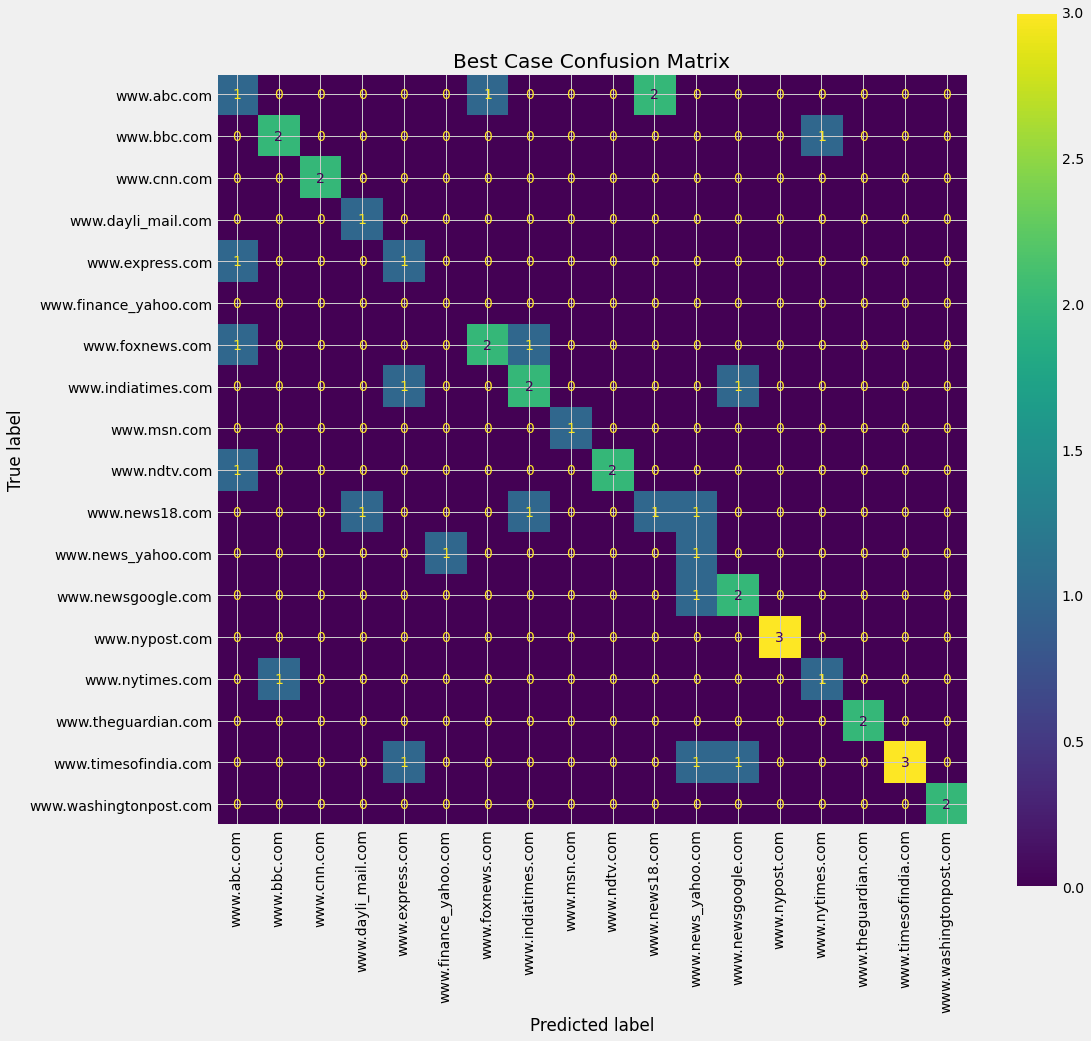

In [296]:
#Plotting BEST CASE cm

for train, test in skf.split(X_norm, Y):

      knn = KNeighborsClassifier(1)
     
      knn.fit(X_norm[train], Y[train])
     
      knn_predict1 = knn.predict(X_norm[test])
      
      knn_report = classification_report(Y[test],knn_predict1,target_names=le.inverse_transform(np.arange(len(gt))),digits=3,output_dict=True,zero_division='warn')
      fold_accuracy = knn_report['accuracy']
     
      cm = confusion_matrix(Y[test],knn.predict(X_norm[test]))
      tot_cm = tot_cm + cm;
      
      accuracy=metrics.accuracy_score(Y[test],knn_predict1)     
     
      accuracy = accuracy.mean()
     
      accuracY_list.append(accuracy)


fig, ax = plt.subplots(figsize=(15, 15));
ax.title.set_text('Best Case Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(knn_predict1, Y[test], ax=ax, display_labels=le.inverse_transform(np.arange(len(gt))));
ax.tick_params(axis='x', labelrotation=90)

#accuracy vs K plot


In [284]:
import matplotlib.pyplot as plt
from itertools import zip_longest
test_list = accuracY_list

def group_elements(n, iterable, padvalue='x'):
    return zip_longest(*[iter(iterable)]*n, fillvalue=padvalue)
accuracy_mean = []

for output in group_elements(3,test_list):
    accuracy_mean.append(statistics.mean( list(output) ))

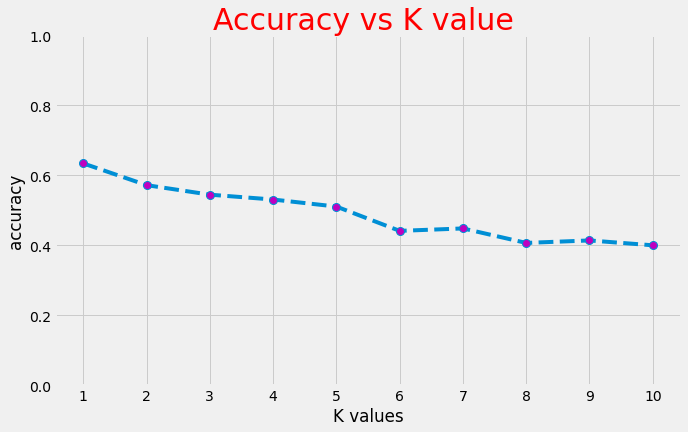

In [394]:
fig, ax = plt.subplots()
ax.plot(x1, accuracy_mean,linestyle='dashed',marker='o', markerfacecolor='m',markersize=8)
ax.set_xticks(x1);
ax.set_ylim(0,1);
ax.set_title('Accuracy vs K value ',fontsize = 30,color = 'r');
ax.set_xlabel('K values');
ax.set_ylabel('accuracy');


The explanation that I tried to give to this low accuracy vs K value is that Ii I would have needed more packets in order to improve the classification of the all classes(maybe considering to kill tcpdump after more time) and given that the number of the sites was not a small number.
An incredible result was obtained instead with the new testset that performed better than the previous one.

#accuracy with new test set (Dataset Generation)

## Test set generation


In [322]:
#the old training set is stored here
old_train_set = train


In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w ndtv_capture.pcapng  & (sleep 10; curl 'https://www.ndtv.com'> /dev/null) & (sleep 10; curl -s 'https://www.ndtv.com'> /dev/null) & (sleep 10;curl -s 'https://www.ndtv.com'> /dev/null)  & (sleep 50;killall tcpdump);

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w abc.pcapng  & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 10; curl 'https://www.abc.net.au'> /dev/null) & (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w news_google.pcapng & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.news.google.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w dayli_mail.pcapng & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null) & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null) & (sleep 10;curl 'https://www.dailymail.co.uk' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w indiatimes.pcapng & (sleep 10;curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10;curl 'https://www.indiatimes.com' > /dev/null) & (sleep 10;curl 'https://www.indiatimes.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w timesofindia.pcapng & (sleep 10;curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10;curl 'https://www.timesofindia.com' > /dev/null) & (sleep 10;curl 'https://www.timesofindia.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w news_yahoo.pcapng & (sleep 10;curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10;curl 'https://www.news.yahoo.com' > /dev/null) & (sleep 10;curl 'https://www.news.yahoo.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w express.pcapng & (sleep 10;curl 'https://www.news.google.com' > /dev/null) & (sleep 10;curl 'https://www.express.co.uk' > /dev/null) & (sleep 10;curl 'https://www.express.co.uk' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w msn.pcapng & (sleep 10;curl 'https://www.msn.com' > /dev/null) & (sleep 10;curl 'https://www.msn.com' > /dev/null) & (sleep 10;curl 'https://www.msn.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w rt.pcapng & (sleep 10;curl 'https://www.rt.com' > /dev/null) & (sleep 10;curl 'https://www.rt.com' > /dev/null) & (sleep 10;curl 'https://www.rt.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w foxnews.pcapng & (sleep 10;curl 'https://www.foxnews.com' > /dev/null) & (sleep 10;curl 'https://www.foxnews.com' > /dev/null) & (sleep 10;curl 'https://www.foxnews.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w finance_yahoo.pcapng & (sleep 10;curl 'https://www.finance.yahoo.com' > /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com' > /dev/null) & (sleep 10;curl 'https://www.finance.yahoo.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w nypost.pcapng & (sleep 10;curl 'https://www.nypost.com' > /dev/null) & (sleep 10;curl 'https://www.nypost.com' > /dev/null) & (sleep 10;curl 'https://www.nypost.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w theguardian.pcapng & (sleep 10;curl 'https://www.theguardian.com' > /dev/null) & (sleep 10;curl 'https://www.theguardian.com' > /dev/null) & (sleep 10;curl 'https://www.theguardian.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w bbc.pcapng & (sleep 10;curl 'https://www.bbc.co.uk' > /dev/null) & (sleep 10;curl 'https://www.bbc.co.uk' > /dev/null) & (sleep 10;curl 'https://www.bbc.co.uk' > /dev/null)  &  (sleep 50;killall tcpdump)

In [338]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w nytimes.pcapng & (sleep 10;curl 'https://www.nytimes.com' > /dev/null) & (sleep 10;curl 'https://www.nytimes.com' > /dev/null) & (sleep 10;curl 'https://www.nytimes.com' > /dev/null)  &  (sleep 50;killall tcpdump)

tcpdump: listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1988k  100 1988k    0     0  12.5M      0 --:--:-- --:--:-- --:--:-- 12.5M
100 1985k  100 1985k    0     0  10.5M      0 --:--:-- --:--:-- --:--:-- 10.5M
100 1985k  100 1985k    0     0  9828k      0 --:--:-- --:--:-- --:--:-- 9828k
52 packets captured
52 packets received by filter


In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w cnn.pcapng & (sleep 10;curl 'https://www.cnn.com' > /dev/null) & (sleep 10;curl 'https://www.cnn.com' > /dev/null) & (sleep 10;curl 'https://www.cnn.com' > /dev/null)  &  (sleep 50;killall tcpdump)

In [ ]:
!tcpdump -i eth0 "(tcp[((tcp[12] & 0xf0) >>2)] = 0x16) or (tcp[((tcp[12] & 0xf0) >>2)+9] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)+10] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x17) or (tcp[((tcp[12] & 0xf0) >>2)+1] = 0x03) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x15) or (tcp[((tcp[12] & 0xf0) >>2)] = 0x21)"  -w news_18.pcapng & (sleep 10;curl 'https://www.news18.com' > /dev/null) & (sleep 10;curl 'https://www.news18.com' > /dev/null) & (sleep 10;curl 'https://www.news18.com' > /dev/null)  &  (sleep 50;killall tcpdump)

##tshark commands

In [323]:
!tshark -r "abc.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.flags.ack -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > abc.csv

Running as user "root" and group "root". This could be dangerous.


In [325]:
!tshark -r "daily_mail.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > dayli_mail.csv

Running as user "root" and group "root". This could be dangerous.


In [326]:
!tshark -r "express.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > express.csv

Running as user "root" and group "root". This could be dangerous.


In [327]:
!tshark -r "indiatimes.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > indiatimes.csv

Running as user "root" and group "root". This could be dangerous.


In [330]:
!tshark -r "news_18.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > news18.csv

Running as user "root" and group "root". This could be dangerous.


In [331]:
!tshark -r "news_google.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > newsgoogle.csv

Running as user "root" and group "root". This could be dangerous.


In [332]:
!tshark -r "news_yahoo.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > news_yahoo.csv

Running as user "root" and group "root". This could be dangerous.


In [333]:
!tshark -r "news_yahoo.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > news_yahoo.csv

Running as user "root" and group "root". This could be dangerous.


In [334]:
!tshark -r "timesofindia.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > timesofindia.csv

Running as user "root" and group "root". This could be dangerous.


In [335]:
!tshark -r "ndtv_capture.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > ndtv.csv

Running as user "root" and group "root". This could be dangerous.


In [340]:
!tshark -r 'nytimes.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > nytimes.csv

Running as user "root" and group "root". This could be dangerous.


In [337]:
!tshark -r 'bbc.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > bbc.csv

Running as user "root" and group "root". This could be dangerous.


In [342]:
!tshark -r "washingtonpost.pcapng" -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > washingtonpost.csv

Running as user "root" and group "root". This could be dangerous.


In [343]:
!tshark -r "msn.pcapng" -R "tcp"  -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > msn.csv

Running as user "root" and group "root". This could be dangerous.


In [344]:
!tshark -r "rt.pcapng"  -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > rt.csv

Running as user "root" and group "root". This could be dangerous.


In [345]:
!tshark -r 'foxnews.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f > foxnews.csv

Running as user "root" and group "root". This could be dangerous.


In [347]:
!tshark -r 'nypost.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f  > nypost.csv

Running as user "root" and group "root". This could be dangerous.


In [348]:
!tshark -r 'cnn.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f  > cnn.csv

Running as user "root" and group "root". This could be dangerous.


In [349]:
!tshark -r 'finance_yahoo.pcapng' -R "tcp" -2 -T fields -e frame.number -e frame.time -e frame.len -e frame.cap_len -e sll.pkttype -e sll.hatype -e sll.halen -e sll.src.eth -e sll.unused -e sll.etype -e ip.hdr_len -e ip.dsfield.ecn -e ip.len -e ip.id -e ip.frag_offset -e ip.ttl -e ip.proto -e ip.checksum -e ip.src -e ip.dst -e tcp.len -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.ack -e tcp.flags.fin -e tcp.window_size_value -e tcp.checksum -e tcp.urgent_pointer -e tcp.option_kind -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e udp.srcport -e udp.dstport -e udp.length -e udp.checksum -e gquic.puflags.rsv -e gquic.packet_number  -E header=y -E separator=, -E quote=d -E occurrence=f  > finance_yahoo.csv

Running as user "root" and group "root". This could be dangerous.


## evaluation of the perfomance of the new testset


In [356]:

from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd

dataset_dw_new = pd.DataFrame()
dataset_up_new = pd.DataFrame()

path = '/content'
tcpdumpfiles = [f for f in listdir(path) if isfile(join(path, f))]
gt= np.unique([f.split('_')[0] for f in tcpdumpfiles])
#print(gt, len(gt), len(tcpdumpfiles))

#variables for up and dw in order to generate the biflow dataset
counter_up=0
counter_dw=0

for f in tcpdumpfiles:
  
  print('Processing file  ', f)

  df = pd.read_csv(join(path,f))
  df_https = df[df["ip.proto"]==6]
  
  df_https = df_https.groupby(["ip.src","ip.dst","tcp.srcport","tcp.dstport"])
  
  for flow,df_flow in df_https: 
    
    if(flow[0]=='172.28.0.2'):
      
      flow_features = extract_features(flow,df_flow,counter_up)
      flow_features['gt'] = 'www.' + f.split('.')[0] + '.com';
      counter_up =counter_up + 1;   
    
    else:
      
      flow_features = extract_features(flow,df_flow,counter)
      flow_features['gt'] = 'www.' + f.split('.')[0] + '.com';
      counter_dw =counter_dw + 1;   
      
    if((flow_features['direction'] =='uplink')):
      
        dataset_up_new = dataset_up_new.append(flow_features,ignore_index=True);  
      
    else:
      
        dataset_dw = dataset_dw_new.append(flow_features,ignore_index=True);  



dataset_up_new.to_csv('datasetupnew.csv', index=False, line_terminator='\n')

dataset_dw_new.to_csv('datasetdwnew.csv', index=False, line_terminator='\n')

#the value couter helped me creating the biflow dataset.
#thanks to it a merge has been possible between the two dataset,
#one for up and the other for downlink, based on the ground truth information
#and on counter variable

datasetnew =pd.merge(dataset_up,dataset_dw,on=['gt','counter'],how='outer')

dataset.drop(columns='counter')

dataset.to_csv('traffic_classification_dataset_new.csv', index=False, line_terminator='\n')


Processing file   abc.csv
Processing file   news_yahoo.csv
Processing file   foxnews.csv
Processing file   rt.csv
Processing file   nypost.csv
Processing file   indiatimes.csv
Processing file   news18.csv
Processing file   bbc.csv
Processing file   washingtonpost.csv
Processing file   cnn.csv
Processing file   newsgoogle.csv
Processing file   nytimes.csv
Processing file   ndtv.csv
Processing file   timesofindia.csv
Processing file   msn.csv
Processing file   daily_mail.csv
Processing file   express.csv
Processing file   finance_yahoo.csv


In [ ]:
from matplotlib.ticker import OldAutoLocator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import warnings
import statistics

from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

warnings.filterwarnings('ignore')

#constructing features
le = LabelEncoder();
scaler = StandardScaler();


#using only traffic features
#here are dropped all the columns Nan and all the columns with values not related
#to a traffic classification
X = dataset.drop(['direction_x','direction_y','host.ip_x','host.ip_x','src.ip_x','src.ip_y','host.ip_y','counter'],axis=1).dropna();

Y = le.fit_transform(X['gt']);
X = X.drop('gt',axis=1);

X_norm = scaler.fit_transform(X);

#now let's use a stratified k-fold cross validation approach with 3 splits
tot_cm = np.zeros([len(gt),len(gt)])
accuracY_list= []
skf = StratifiedKFold(n_splits=3,shuffle=True)


for n_neighbors in range(1,11):
  
  #here it is used the old training set
  for old_train_set, test in skf.split(X_norm, Y):

      knn = KNeighborsClassifier(n_neighbors)
     
      knn.fit(X_norm[train], Y[train])
     
      knn_predict = knn.predict(X_norm[test])
      
      knn_report = classification_report(Y[test],knn_predict,target_names=le.inverse_transform(np.arange(len(gt))),digits=3,output_dict=True,zero_division='warn')
      fold_accuracy = knn_report['accuracy']
      #print(fold_accuracy)
      cm = confusion_matrix(Y[test],knn.predict(X_norm[test]))
      tot_cm = tot_cm + cm;
      
      accuracy=metrics.accuracy_score(Y[test],knn_predict)     
      accuracy = accuracy.mean()
      accuracY_list.append(accuracy)
      

In [362]:
import matplotlib.pyplot as plt
from itertools import zip_longest
test_list = accuracY_list

def group_elements(n, iterable, padvalue='x'):
    return zip_longest(*[iter(iterable)]*n, fillvalue=padvalue)
accuracy_mean_new = []

for output in group_elements(3,test_list):
    accuracy_mean_new.append(statistics.mean( list(output) ))

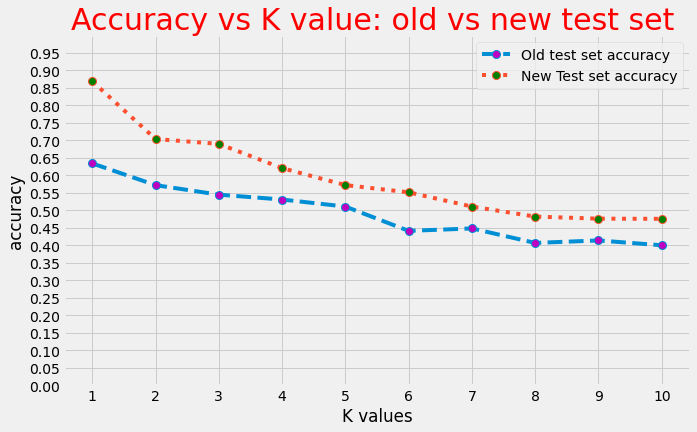

In [410]:
#after the creation of the new test set and the evaluation 
#of the accuracy of the classifier for each K
#it is plotted a figure that will confrontate the two testsets
fig, ax1 = plt.subplots()
ax1.plot(x1, accuracy_mean,linestyle='dashed',marker='o', markerfacecolor='m',markersize=8)
ax1.set_xticks(x1);
ax1.set_ylim(0,1);
ax1.set_yticks(ticks=np.arange(0,1,0.05));
ax1.set_title('Accuracy vs K value: old vs new test set ',fontsize = 30,color = 'r');
ax1.set_xlabel('K values');
ax1.set_ylabel('accuracy');
ax1.plot(x1,accuracy_mean_new,linestyle=':',marker='o',markerfacecolor='green',markersize=8)
ax1.legend(['Old test set accuracy', 'New Test set accuracy']);